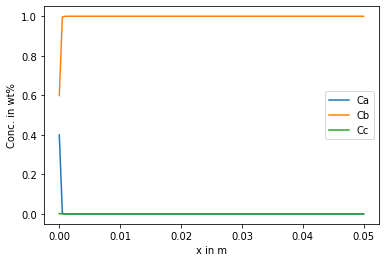

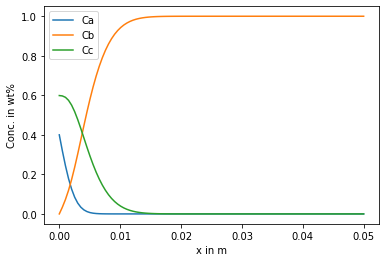

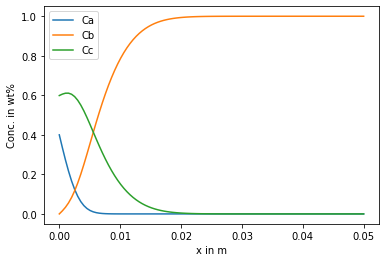

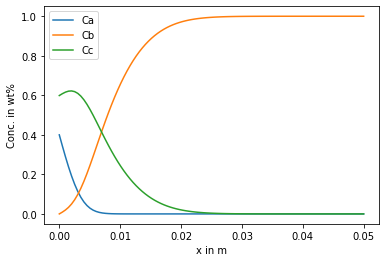

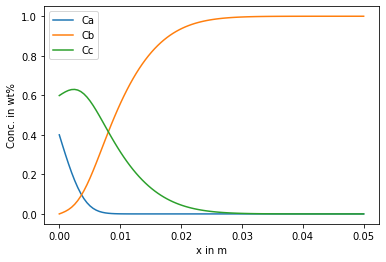

KeyboardInterrupt: ignored

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plot_every = 5000

x=np.linspace(0,0.05,100)

k_l =0.0001
k_reaxn = 0.1

def second_deriv(C,dx1):
  return (C[2:]+C[:-2]-2*C[1:-1])/dx1

dx = x[1]-x[0]

a_interface = 0.01
V_bulk      = 0.00025

Ca =np.linspace(0.4,0.01,100)
dC = Ca[0]-Ca[1]

time_step_length = 0.05 #s 

y=np.zeros_like(x)
Cb=np.ones_like(Ca)
Cb[0]=1- Ca[0]

Ca_prev=np.zeros_like(Ca)
Ca_prev[0]=0.4
Ca_new=np.zeros_like(Ca)
Cb_new=np.zeros_like(Ca)
Cb_prev= 1 -Ca_prev
Cc_new=np.zeros_like(Ca)
Cc_prev=np.zeros_like(Ca)

Ca_new[0]=0.4

Cb_new[0] = 1 - Ca_new[0]

time= 500000

time_steps =int(time/time_step_length)

for i in range(0,time_steps):
  Ca_new[1:-1] = Ca_prev[1:-1] + time_step_length*(second_deriv(Ca_prev,dx)*k_l - k_reaxn*Ca_prev[1:-1]*Cb_prev[1:-1])
  Cb_new[1:-1] = Cb_prev[1:-1] + time_step_length*(second_deriv(Cb_prev,dx)*k_l - k_reaxn*Ca_prev[1:-1]*Cb_prev[1:-1])
  Cc_new[1:-1] = Cc_prev[1:-1] + time_step_length*(second_deriv(Cc_prev,dx)*k_l + k_reaxn*Ca_prev[1:-1]*Cb_prev[1:-1])
  

  Ca_new[0] = Ca_new[0] 
  Cb_new[0] = Cb_new[0] - time_step_length*(k_reaxn*Ca_new[0]*Cb_prev[0])
  Cc_new[0] = Cc_new[0] + time_step_length*(k_reaxn*Ca_new[0]*Cb_prev[0])



  Ca_new[-1] = (k_l*a_interface*(Ca_new[-3]-Ca_new[-2])-a_interface*dx*k_reaxn*Ca_new[-2]*Cb_new[-2])/V_bulk + Ca_new[-1]
  Cc_new[-1] = (k_l*a_interface*(Cc_new[-3]-Cc_new[-2])-a_interface*dx*k_reaxn*Cc_new[-2]*Cc_new[-2])/V_bulk + Cc_new[-1]
  Cb_new[-1]=1-Ca_new[-1]-Cc_new[-1]



  Ca_prev = Ca_new
  Cb_prev = Cb_new
  Cc_prev = Cc_new

  if (i%plot_every==0):
      # plt.figure(figsize=(15,8))
    plt.plot(x,Ca_new)
    plt.plot(x,Cb_new)
    plt.plot(x,Cc_new)
    plt.xlabel('x in m')
    plt.ylabel('Conc. in wt%')
    plt.legend(['Ca', 'Cb', 'Cc'])
      # plt.plot(x,Cc_new)
      # plt.plot(x,Ca_new+Cb_new+Cc_new)
    plt.pause(0.5)
    plt.clf()

In [ ]:

Cc_new[-1], Ca_new[-1], Cb_new[-1], Cc_new[-1]+ Ca_new[-1] +Cb_new[-1]

(0.3315071540110437, 0.005135111556687405, 0.6633577344322689, 1.0)

In [ ]:
Cb_new[0]

-0.030068047527795683

In [ ]:
# importing required libraries
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.animation as animation
from IPython import display
  
# initializing a figure
fig = plt.figure()
  
# labeling the x-axis and y-axis
axis = plt.axes(xlim=(0, 4),  ylim=(-1.5, 1.5))
  
# initializing a line variable
line, = axis.plot([], [], lw=3)
  
def animate(frame_number):
    x = np.linspace(0, 4, 1000)
  
    # plots a sine graph
    y = np.sin(2 * np.pi * (x - 0.01 * frame_number))
    line.set_data(x, y)
    line.set_color('green')
    return line,
  
  
anim = animation.FuncAnimation(fig, animate, frames=1000, 
                               interval=20, blit=True)
fig.suptitle('Sine wave plot', fontsize=14)
  
# converting to an html5 video
video = anim.to_html5_video()
  
# embedding for the video
html = display.HTML(video)
  
# draw the animation
display.display(html)
plt.close()

In [1]:
# importing required libraries
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.animation as animation
from IPython import display
  
# initializing a figure
fig = plt.figure()
  
# labeling the x-axis and y-axis
axis = plt.axes(xlim=(0, 1000),  ylim=(0, 1000))
  
# lists storing x and y values
x, y = [], []
  
line, = axis.plot(0, 0)
  
  
def animate(frame_number):
    x.append(frame_number)
    y.append(frame_number)
    line.set_xdata(x)
    line.set_ydata(y)
    return line,
  
  
anim = animation.FuncAnimation(fig, animate, frames=1000, 
                               interval=20, blit=True)
fig.suptitle('Straight Line plot', fontsize=14)
  
# saving to m4 using ffmpeg writer
writervideo = animation.FFMpegWriter(fps=60)
anim.save('increasingStraightLine.mp4', writer=writervideo)
plt.close()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython import display

plot_every = 5000

x=np.linspace(0,0.05,100)

k_l =0.0001
k_reaxn = 0.1

def second_deriv(C,dx1):
  return (C[2:]+C[:-2]-2*C[1:-1])/dx1

dx = x[1]-x[0]

a_interface = 0.01
V_bulk      = 0.00025

Ca =np.linspace(0.4,0.01,100)
dC = Ca[0]-Ca[1]

time_step_length = 0.05 #s 

y=np.zeros_like(x)
Cb=np.ones_like(Ca)
Cb[0]=1- Ca[0]

Ca_prev=np.zeros_like(Ca)
Ca_prev[0]=0.4
Ca_new=np.zeros_like(Ca)
Cb_new=np.zeros_like(Ca)
Cb_prev= 1 -Ca_prev
Cc_new=np.zeros_like(Ca)
Cc_prev=np.zeros_like(Ca)

Ca_new[0]=0.4

Cb_new[0] = 1 - Ca_new[0]

time= 500000

time_steps =int(time/time_step_length)

# initializing a figure
fig = plt.figure()
  
# labeling the x-axis and y-axis
axis = plt.axes()
  
# lists storing x and y values
x, y = [], []
  
line1, = axis.plot([], [], lw=3)
# line2, = axis.plot([], [], lw=3)
# line3, = axis.plot([], [], lw=3)

# line=[line1,line2,line3]


def update_in_time(timeframe):
  global Ca_new, Cb_new, Cc_new, Ca_prev, Cb_prev, Cc_prev

  Ca_new[1:-1] = Ca_prev[1:-1] + time_step_length*(second_deriv(Ca_prev,dx)*k_l - k_reaxn*Ca_prev[1:-1]*Cb_prev[1:-1])
  Cb_new[1:-1] = Cb_prev[1:-1] + time_step_length*(second_deriv(Cb_prev,dx)*k_l - k_reaxn*Ca_prev[1:-1]*Cb_prev[1:-1])
  Cc_new[1:-1] = Cc_prev[1:-1] + time_step_length*(second_deriv(Cc_prev,dx)*k_l + k_reaxn*Ca_prev[1:-1]*Cb_prev[1:-1])
  

  Ca_new[0] = Ca_new[0] 
  Cb_new[0] = Cb_new[0] - time_step_length*(k_reaxn*Ca_new[0]*Cb_prev[0])
  Cc_new[0] = Cc_new[0] + time_step_length*(k_reaxn*Ca_new[0]*Cb_prev[0])



  Ca_new[-1] = (k_l*a_interface*(Ca_new[-3]-Ca_new[-2])-a_interface*dx*k_reaxn*Ca_new[-2]*Cb_new[-2])/V_bulk + Ca_new[-1]
  Cc_new[-1] = (k_l*a_interface*(Cc_new[-3]-Cc_new[-2])-a_interface*dx*k_reaxn*Cc_new[-2]*Cc_new[-2])/V_bulk + Cc_new[-1]
  Cb_new[-1]=1-Ca_new[-1]-Cc_new[-1]



  Ca_prev = Ca_new
  Cb_prev = Cb_new
  Cc_prev = Cc_new

  line1.set_data(x,Ca_new)
  # line[1].set_data(x,Cb_new)
  # line[2].set_data(x,Cc_new)


  
  return line1
      # plt.figure(figsize=(15,8))

anim = animation.FuncAnimation(fig, update_in_time, frames=5000, 
                               interval=20, blit=True)

fig.suptitle('Conc. Profile', fontsize=14)
  
# converting to an html5 video
video = anim.to_html5_video()
  
# embedding for the video
html = display.HTML(video)
  
# draw the animation
display.display(html)
plt.close()

Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py", line 196, in process
    func(*args, **kwargs)
  File "/usr/local/lib/python3.8/dist-packages/matplotlib/animation.py", line 951, in _start
    self._init_draw()
  File "/usr/local/lib/python3.8/dist-packages/matplotlib/animation.py", line 1743, in _init_draw
    self._draw_frame(next(self.new_frame_seq()))
  File "/usr/local/lib/python3.8/dist-packages/matplotlib/animation.py", line 1771, in _draw_frame
    self._drawn_artists = sorted(self._drawn_artists,
TypeError: 'Line2D' object is not iterable


TypeError: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fb0269b5160> (for post_execute):


ValueError: ignored

ValueError: ignored

<Figure size 432x288 with 1 Axes>